In [5]:
import pandas as pd
pd.options.display.max_rows=10
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('./dataset/SMSSpamCollection',sep='\t',encoding='ISO-8859-1',names=['label','messages'])

In [7]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


{'ham': 0,'spam':1}

In [8]:
print(df.shape)

(5572, 2)


- 数据分布规模

In [9]:
print("垃圾邮件个数：%s" % df[df['label']=='spam'].shape[0])
print("正常邮件个数：%s" % df[df['label']=='ham'].shape[0])

垃圾邮件个数：747
正常邮件个数：4825


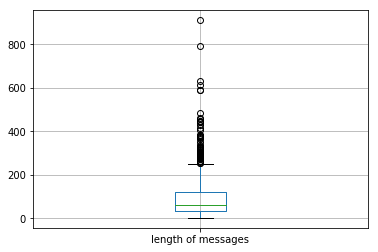

In [10]:
messages_len=[]
for i in df['messages']:
    messages_len.append(len(i))
messages_len=pd.DataFrame(messages_len,columns=['length of messages'])
messages_len.boxplot(column='length of messages')
plt.show()

####  数据预处理

In [11]:
df['label']=df.label.map({'ham':0,'spam':1})

In [12]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### BOW处理

拿出一段文本，计算该文本中单词的出现频率（BOW针对于每个单词的顺序要求不重要）

举例`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

![](https://img-blog.csdnimg.cn/20190330183545319.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzI5MzE3NjE3,size_16,color_FFFFFF,t_70)

我们使用sklearns count vectorizer方法 
- token化字符串，将字符串划分为单个单词 并为每个令牌设定一个int id
- 计算每个token 出现的次数

- 数据集切分

In [13]:
from sklearn.cross_validation import train_test_split

E:\Enviroment\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df['messages'], 
                                                    df['label'], 
                                                    random_state=1)

In [15]:
x_train

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ã neva tell me how i noe... I'm not at home i...
                              ...                        
905     We're all getting worried over here, derek and...
5192    Oh oh... Den muz change plan liao... Go back h...
3980    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235     Text & meet someone sexy today. U can find a d...
5157                              K k:) sms chat with me.
Name: messages, Length: 4179, dtype: object

In [16]:
print('Number of rows in the total set:{}'.format(df.shape[0]))
print('Number of rows in the training set:{}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set:5572
Number of rows in the training set:4179
Number of rows in the test set: 1393


- 数据集BOW

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [18]:
training_data = count_vector.fit_transform(x_train)
count_vector.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [19]:
train_array=count_vector.transform(x_train).toarray()
train_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
frequency_matrix = pd.DataFrame(train_array, columns = count_vector.get_feature_names())
frequency_matrix

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zebra,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,ã¼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
testing_data = count_vector.transform(x_test)
testing_data

<1393x7489 sparse matrix of type '<class 'numpy.int64'>'
	with 17632 stored elements in Compressed Sparse Row format>

In [22]:
testing_array=testing_data.toarray()
test_frequency_matrix = pd.DataFrame(testing_array, columns = count_vector.get_feature_names())
test_frequency_matrix

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zebra,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,ã¼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- naive_bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
predictions = naive_bayes.predict(testing_data)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', '{:.3f}'.format(accuracy_score(y_test, predictions)*100))
print('Precision score: ', '{:.3f}'.format(precision_score(y_test, predictions)*100))
print('Recall score: ', '{:.3f}'.format(recall_score(y_test, predictions)*100))
print('F1 score: ', '{:.3f}'.format(f1_score(y_test, predictions)*100))

Accuracy score:  98.780
Precision score:  97.191
Recall score:  93.514
F1 score:  95.317


- svm

In [28]:
from sklearn import svm

In [29]:
c=0.1
clf_svm=svm.SVC(c,kernel='linear')
clf_svm.fit(training_data,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
p_svm=clf_svm.predict(testing_data)

In [31]:
print('Accuracy score: ', '{:.3f}'.format(accuracy_score(y_test, p_svm)*100))
print('Precision score: ', '{:.3f}'.format(precision_score(y_test, p_svm)*100))
print('Recall score: ', '{:.3f}'.format(recall_score(y_test, p_svm)*100))
print('F1 score: ', '{:.3f}'.format(f1_score(y_test, p_svm)*100))

Accuracy score:  98.564
Precision score:  98.817
Recall score:  90.270
F1 score:  94.350


In [32]:
c=0.1
clf_svm2=svm.SVC(c,kernel='rbf', gamma=1.0)
clf_svm2.fit(training_data,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
p_svm2=clf_svm2.predict(testing_data)

In [35]:
print('Accuracy score: ', '{:.3f}'.format(accuracy_score(y_test, p_svm2)*100))
print('Precision score: ', '{:.3f}'.format(precision_score(y_test, p_svm2)*100))
print('Recall score: ', '{:.3f}'.format(recall_score(y_test, p_svm2)*100))
print('F1 score: ', '{:.3f}'.format(f1_score(y_test, p_svm2)*100))

Accuracy score:  86.719
Precision score:  0.000
Recall score:  0.000
F1 score:  0.000


E:\Enviroment\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Enviroment\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- 逻辑回归模型

In [29]:
from sklearn.linear_model.logistic import LogisticRegression

In [46]:
LR=LogisticRegression()
LR.fit(training_data,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
p_lr=LR.predict(testing_data)

In [48]:
print('Accuracy score:','{:.3f}'.format(accuracy_score(y_test, p_lr)*100))
print('Precision score: ', '{:.3f}'.format(precision_score(y_test, p_lr)*100))
print('Recall score: ', '{:.3f}'.format(recall_score(y_test, p_lr)*100))
print('F1 score: ', '{:.3f}'.format(f1_score(y_test, p_lr)*100))

Accuracy score: 98.780
Precision score:  99.412
Recall score:  91.351
F1 score:  95.211


- 对比

- 调参

In [52]:
LR2=LogisticRegression(solver='sag',tol=0.01)
LR2.fit(training_data,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.01,
          verbose=0, warm_start=False)

In [53]:
p_lr2=LR2.predict(testing_data)

In [54]:
print('Accuracy score:','{:.3f}'.format(accuracy_score(y_test, p_lr2)*100))
print('Precision score: ', '{:.3f}'.format(precision_score(y_test, p_lr2)*100))
print('Recall score: ', '{:.3f}'.format(recall_score(y_test, p_lr2)*100))
print('F1 score: ', '{:.3f}'.format(f1_score(y_test, p_lr2)*100))

Accuracy score: 98.062
Precision score:  97.024
Recall score:  88.108
F1 score:  92.351


In [55]:
LR3=LogisticRegression(C=0.2)
LR3.fit(training_data,y_train)
p_lr3=LR3.predict(testing_data)
print('Accuracy score:','{:.3f}'.format(accuracy_score(y_test, p_lr3)*100))
print('Precision score: ', '{:.3f}'.format(precision_score(y_test, p_lr3)*100))
print('Recall score: ', '{:.3f}'.format(recall_score(y_test, p_lr3)*100))
print('F1 score: ', '{:.3f}'.format(f1_score(y_test, p_lr3)*100))

Accuracy score: 98.134
Precision score:  98.773
Recall score:  87.027
F1 score:  92.529
